 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [66]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
csv_path = Path("whale_returns.csv")

#whale_data = pd.read_csv(csv_path,index_col='Date',parse_dates=True)

In [3]:
whale_data = pd.read_csv(csv_path,index_col='Date', infer_datetime_format=True, parse_dates=True )

In [4]:
# Reading whale returns
#print(whale_data)
whale_data.sort_index()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-01-04,0.000919,0.000157,-0.002002,-0.003865
2015-01-05,0.006051,0.002551,0.006526,0.009650
2015-01-06,0.002081,-0.000113,0.000837,0.002916
2015-01-07,-0.001365,0.002100,0.005815,-0.001304
2015-01-09,-0.018980,-0.012439,-0.022997,-0.037577
...,...,...,...,...
2019-11-03,0.015435,0.005009,0.005324,0.019401
2019-11-04,0.003406,-0.003959,-0.000637,-0.000496
2019-12-02,0.000000,0.000000,0.000000,0.000000


In [5]:
# Count nulls


whale_data.isnull().sum().sum()

4

In [6]:
# Drop nulls
whale_df1 = whale_data.dropna() 

whale_df1.sort_index()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-01-04,0.000919,0.000157,-0.002002,-0.003865
2015-01-05,0.006051,0.002551,0.006526,0.009650
2015-01-06,0.002081,-0.000113,0.000837,0.002916
2015-01-07,-0.001365,0.002100,0.005815,-0.001304
2015-01-09,-0.018980,-0.012439,-0.022997,-0.037577
...,...,...,...,...
2019-11-03,0.015435,0.005009,0.005324,0.019401
2019-11-04,0.003406,-0.003959,-0.000637,-0.000496
2019-12-02,0.000000,0.000000,0.000000,0.000000


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [7]:
# Reading algorithmic returns
csv_path = Path("algo_returns.csv")
algo_data = pd.read_csv(csv_path, index_col='Date', infer_datetime_format=True, parse_dates=True )
algo_data.sort_index()


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [8]:
# Count nulls
algo_data.isnull().sum().sum()

6

In [9]:
# Drop nulls
algo_df1 = algo_data.dropna() 
algo_df1.sort_index()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P TSX 60 Closing Prices
# Reading algorithmic returns
csv_path = Path("sp_tsx_history.csv")
tsx_data = pd.read_csv(csv_path,index_col='Date', infer_datetime_format=True, parse_dates=True)
tsx_data.sort_index()



,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"
...,...
2019-12-20,"$17,118.44"
2019-12-23,"$17,128.71"
2019-12-24,"$17,180.15"


In [11]:
# Check Data Types
tsx_data.dtypes

Close    object
dtype: object

In [12]:
# Fix Data Types
#tsx_data['Date'] = tsx_data['Date'].astype('datetime64[ns]')

#def convert_currency(val):
    #"""
   # Convert the string number value to a float
     #- Remove $
     #- Remove commas
     #- Convert to float type
   # """
    #new_val = val.replace('$','').replace(',', '').replace(".",".")
    #return float(new_val)

tsx_data["Close"] = tsx_data["Close"].str.replace("$", "")
tsx_data["Close"] = tsx_data["Close"].str.replace(",", "")
tsx_data["Close"].head(10)    
#tsx_data['Close'].apply(convert_currency)

#tsx_data[['Close']] = tsx_data[['Close']].apply(pd.to_numeric)
tsx_data["Close"] = pd.to_numeric(tsx_data["Close"], downcast="float")



tsx_data.dtypes




<ipython-input-12-a0df4cc6c794>:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  tsx_data["Close"] = tsx_data["Close"].str.replace("$", "")


Close    float32
dtype: object

In [13]:
# Calculate Daily Returns
#index_col=("Date")
#tsx_data = tsx_data.reset_index()
#tsx_data = tsx_data.pivot_table(values="Close", index="Date")

#tsx_data.head()
#tsx_data = tsx_data(values="Close", index="Date")
#tsx_data = tsx_data(index= "Date")
daily_returns = tsx_data.pct_change()
daily_returns.head()


,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [14]:
# Drop nulls
tsx_df1 = daily_returns.dropna() 
print(tsx_df1)
tsx_df1.sample()

               Close
Date                
2012-10-02  0.001701
2012-10-03 -0.002563
2012-10-04  0.007137
2012-10-05 -0.002305
2012-10-09 -0.011709
...              ...
2019-12-20  0.003188
2019-12-23  0.000600
2019-12-24  0.003003
2019-12-27 -0.000695
2019-12-30 -0.004057

[1817 rows x 1 columns]


,Close
Date,
2013-09-03,0.006844


In [15]:
# Rename `Close` Column to be specific to this portfolio.
tsx_df1.rename(columns = {'Date' : 'Date','Close': 'S&P TSX'}, inplace = True)
tsx_df1.sort_index()

tsx_df1.head()

C:\Users\nd321\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,S&P TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.

#whale_df1 = whale_df1.reset_index()
#whale_df1 = whale_df1.pivot_table(index="Date")

#algo_df1 = algo_df1.reset_index()
#algo_df1 = algo_df1.pivot_table(index="Date")


#tsx_df1 = tsx_df1.reset_index()
#tsx_df1 = tsx_df1.pivot_table(index="Date")

joined_df1 = pd.concat([ whale_df1 , algo_df1 , tsx_df1],axis = "columns" , join ='inner' )
#Sort datetime index in ascending order
joined_df1 = joined_df1.sort_index()
# Set the column names to 'AMZN' and 'S&P 500'
joined_df1.columns = ["SFML" , "P&CO" , "TGML" , "BERK HAWY" , "ALGO1" , "ALGO2" , "S&P TSX"]


joined_df1.head()


,SFML,P&CO,TGML,BERK HAWY,ALGO1,ALGO2,S&P TSX
Date,,,,,,,
2015-01-05,0.006051,0.002551,0.006526,0.009650,0.013712,-0.015621,-0.024465
2015-01-06,0.002081,-0.000113,0.000837,0.002916,0.002307,-0.011984,-0.010139
2015-01-07,-0.001365,0.002100,0.005815,-0.001304,0.003473,0.009418,0.002683
2015-01-09,-0.018980,-0.012439,-0.022997,-0.037577,-0.009436,-0.001881,-0.005035
2015-01-12,0.004271,0.010081,0.009055,0.010649,-0.019423,-0.002282,-0.008336


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

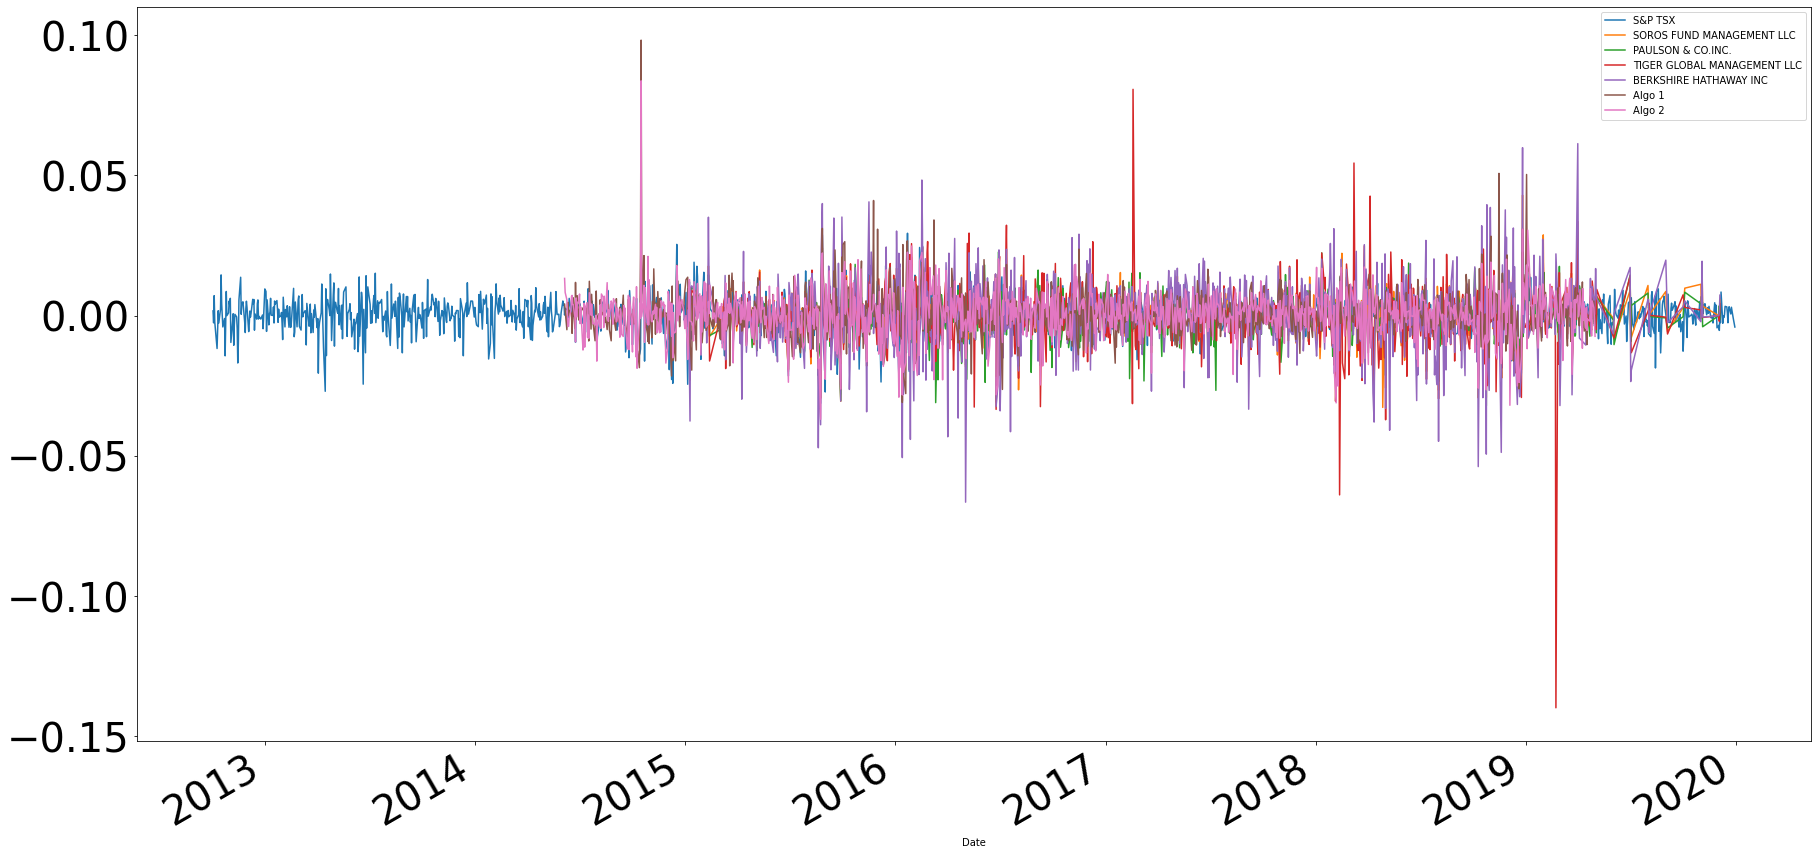

In [17]:
# Plot daily returns of all portfolios
ax=tsx_df1.plot(figsize=(30,15), fontsize=40, rot=90)
whale_df1.plot(ax=ax)
algo_df1.plot(ax=ax)


#### Calculate and Plot cumulative returns.

In [18]:
# Calculate cumulative returns of all portfolios
joined_df2 = joined_df1.dropna()
#columns = {"SOROS FUND MANAGEMENT LLC",	"PAULSON & CO.INC.", "TIGER GLOBAL MANAGEMENT LLC", "BERKSHIRE HATHAWAY INC","Algo 1","Algo 2","S&P TSX"


#joined_df2 = joined_df2.iloc[:],[(0,1,2,3,4,5,6)]
#joined_df2.head()
#joined_df2['cumulative_returns'] = (joined_df2 + 1).cumprod()

#joined_df2['cumulative_returns'] = 100  * (joined_df2.cumsum() / joined_df2.sum())
#joined_df2= np.cumsum(joined_df2)
#joined_df2.head()



In [19]:
#joined_sum = joined_df2.groupby([])
#joined_sum.head()

In [20]:
# Calculate cumulative returns of all portfolios
#joined_df2['cumulative_returns'] = 100  * (joined_cumsum / joined_sum)
joined_df2  = (1 + joined_df2).cumprod()

joined_df2.head()

,SFML,P&CO,TGML,BERK HAWY,ALGO1,ALGO2,S&P TSX
Date,,,,,,,
2015-01-05,1.006051,1.002551,1.006526,1.009650,1.013712,0.984379,0.975535
2015-01-06,1.008145,1.002438,1.007368,1.012594,1.016050,0.972582,0.965644
2015-01-07,1.006769,1.004543,1.013226,1.011273,1.019579,0.981742,0.968235
2015-01-09,0.987661,0.992048,0.989925,0.973273,1.009958,0.979895,0.963359
2015-01-12,0.991880,1.002048,0.998889,0.983637,0.990341,0.977659,0.955329


<AxesSubplot:xlabel='Date'>

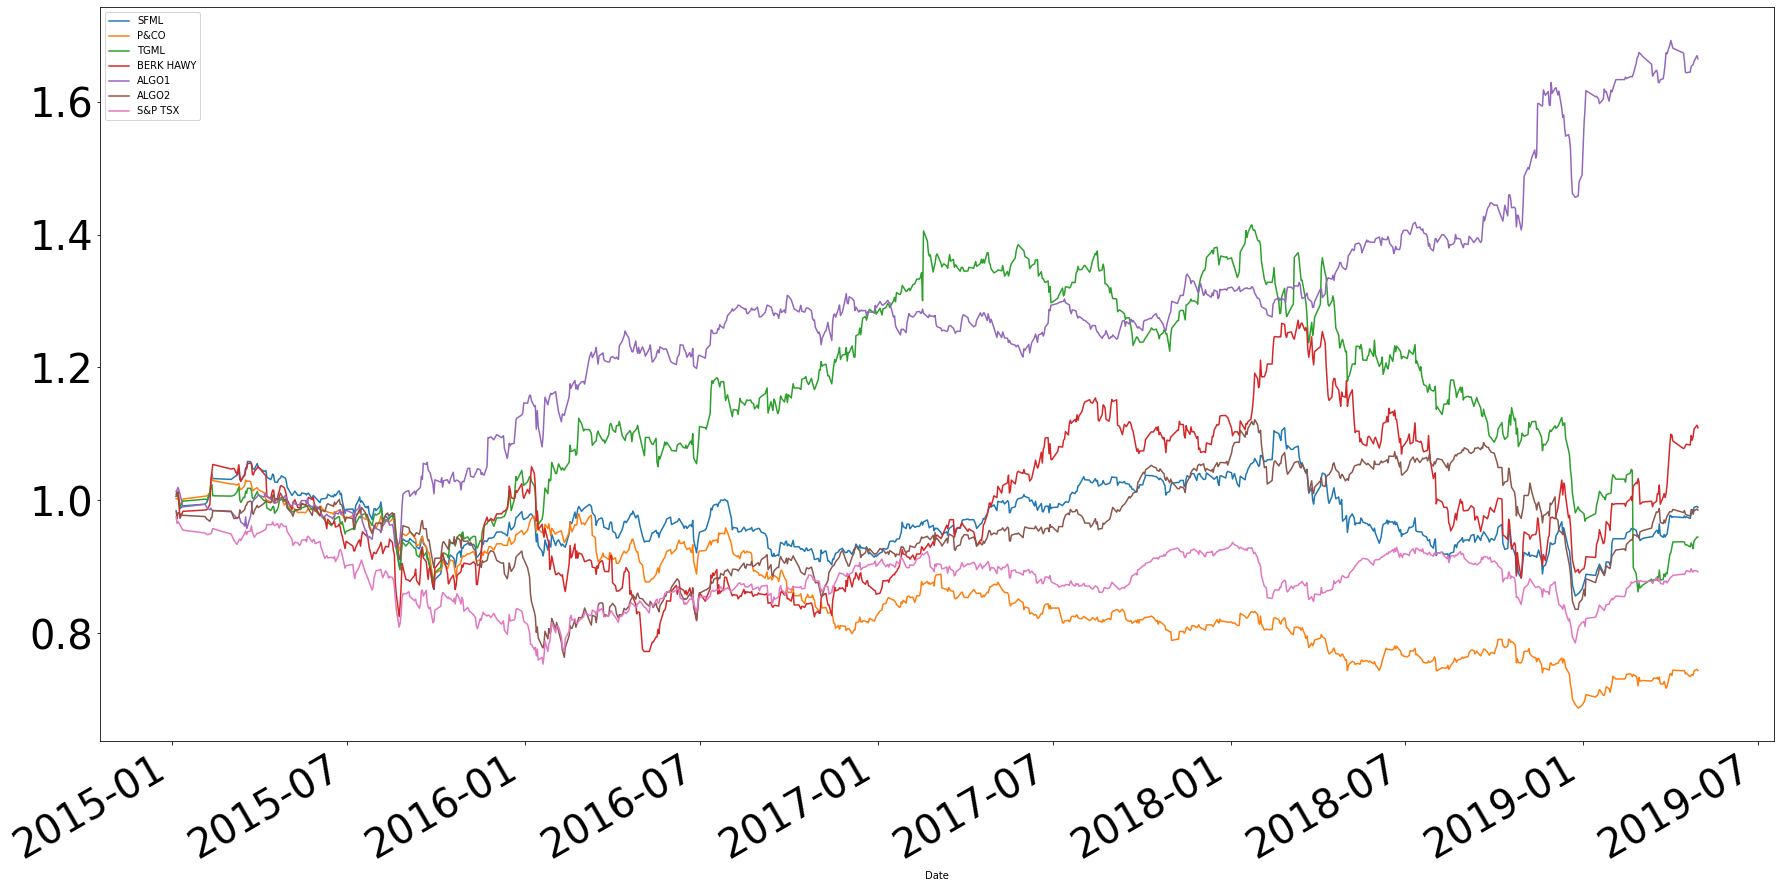

In [21]:
# Plot cumulative returns

joined_df2.plot(fontsize=40, figsize = (30,15))

#joined_df2.plot(ax=ax)

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

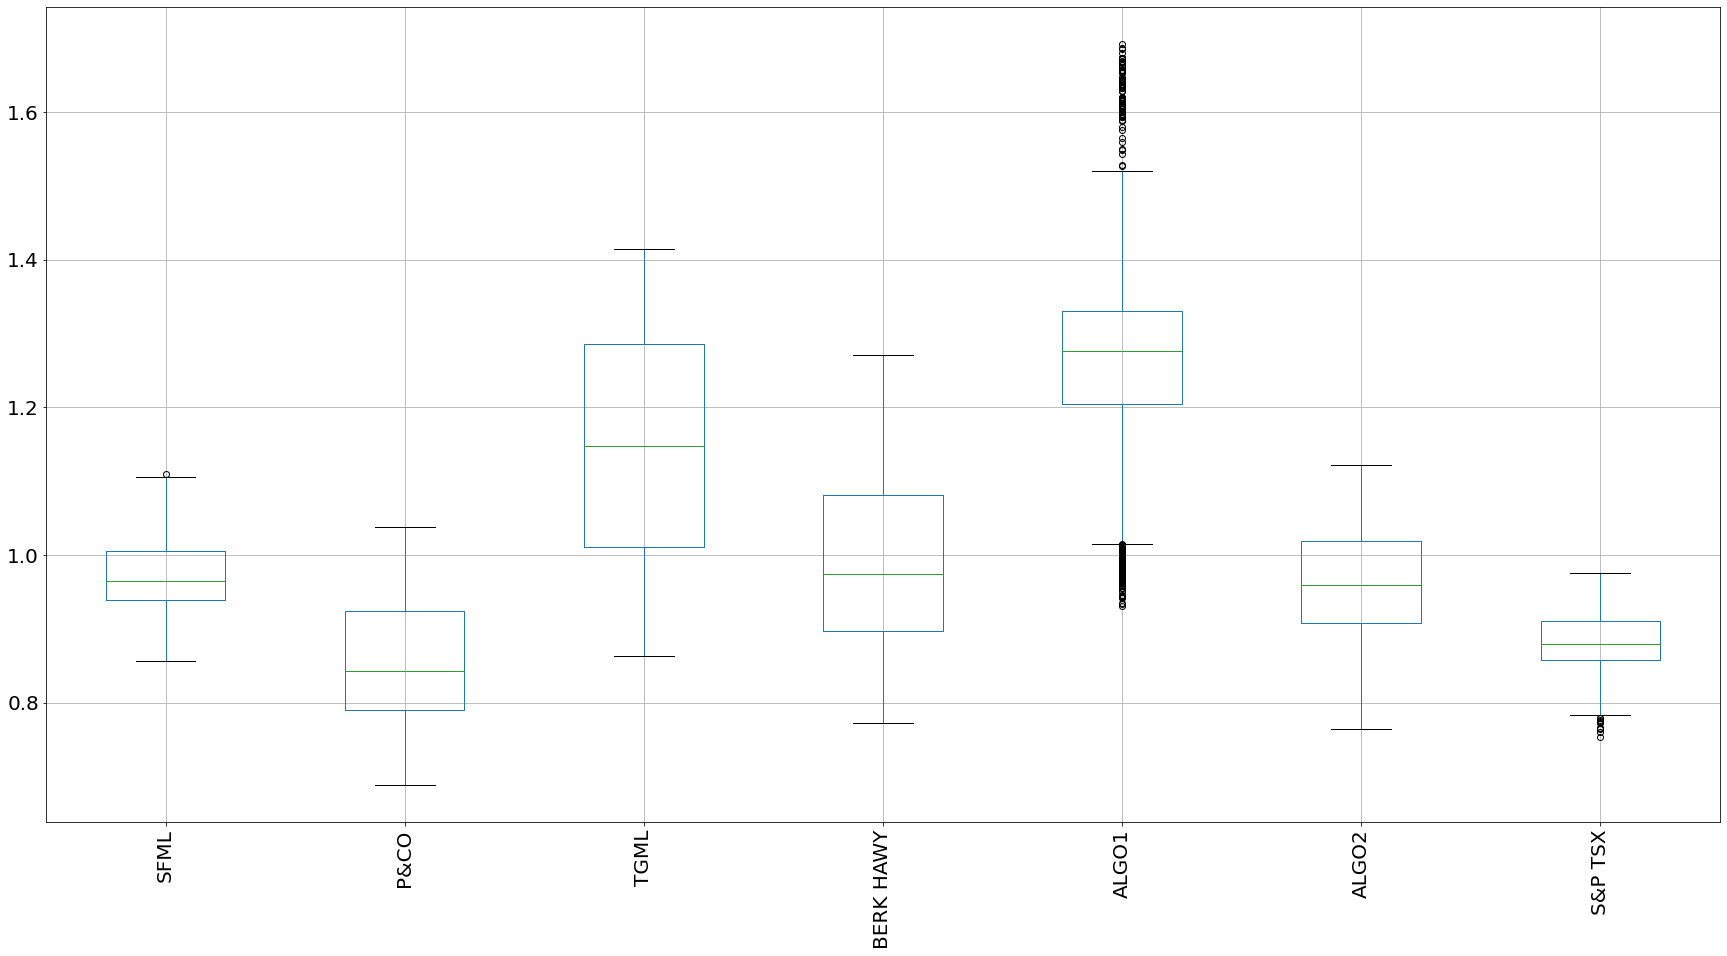

In [22]:
# Box plot to visually show risk
joined_df2.boxplot(rot=90, fontsize=20, figsize=(30,15))

### Calculate Standard Deviations

In [23]:
# Calculate the daily standard deviations of all portfolios

daily_std_joined_df1 = joined_df1.std()
daily_std_joined_df1.head(7)

SFML         0.007950
P&CO         0.006975
TGML         0.011085
BERK HAWY    0.013021
ALGO1        0.007606
ALGO2        0.008370
S&P TSX      0.007119
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [26]:
# Determine which portfolios are riskier than the S&P TSX 60


In [27]:
#Cal.Variance 
daily_returns1 = joined_df1
variance =joined_df1 ['S&P TSX'].var()

variance


5.0679318519541994e-05

In [28]:
#Cal.Co Variance
covariance = joined_df1.cov()
                                     
covariance


,SFML,P&CO,TGML,BERK HAWY,ALGO1,ALGO2,S&P TSX
SFML,0.000063,0.000039,0.000049,0.000078,0.000016,0.000039,0.000030
P&CO,0.000039,0.000049,0.000034,0.000051,0.000011,0.000027,0.000019
TGML,0.000049,0.000034,0.000123,0.000059,0.000010,0.000034,0.000028
BERK HAWY,0.000078,0.000051,0.000059,0.000170,0.000022,0.000050,0.000039
ALGO1,0.000016,0.000011,0.000010,0.000022,0.000058,0.000018,0.000016
ALGO2,0.000039,0.000027,0.000034,0.000050,0.000018,0.000070,0.000044
S&P TSX,0.000030,0.000019,0.000028,0.000039,0.000016,0.000044,0.000051


In [29]:
# Determine which portfolios are riskier than the S&P TSX 60
#Cal Beta  of Soros Fund Management LLC vs. S&P TSX

sfml_beta = covariance.loc['SFML', 'S&P TSX'] / variance

print(f"Soros_Fund_Mgt_LLC Beta is: {sfml_beta} is greater than 0 but less than 1 , hence it indicates that it is less volatile and less risky in comparison to S&P TSX.  ")



Soros_Fund_Mgt_LLC Beta is: 0.5835770541551485 is greater than 0 but less than 1 , hence it indicates that it is less volatile and less risky in comparison to S&P TSX.  


In [30]:
#Cal Beta of Paulson & co Inc vs. S&P TSX

plsn_beta = covariance.loc['P&CO', 'S&P TSX'] / variance

print(f"Paulson & Co .Inc Beta is: {plsn_beta} is greater than 0 but less than 1 , hence it indicates that it is less volatile and less risky in comparison to S&P TSX")


Paulson & Co .Inc Beta is: 0.38419425088460646 is greater than 0 but less than 1 , hence it indicates that it is less volatile and less risky in comparison to S&P TSX


In [31]:
#Cal Beta of Tiger Global Management LLC vs. S&P TSX

tgml_beta = covariance.loc['TGML', 'S&P TSX'] / variance
print(f"Tiger Global Mgt LLC Beta is: {tgml_beta} is greater than 0 but less than 1 , hence it indicates that it is less volatile and less risky in comparison to S&P TSX")


Tiger Global Mgt LLC Beta is: 0.5495344996145883 is greater than 0 but less than 1 , hence it indicates that it is less volatile and less risky in comparison to S&P TSX


In [32]:
#Cal Beta of Berkshire Hathaway LLC vs. S&P TSX

berk_beta = covariance.loc['BERK HAWY', 'S&P TSX'] / variance
print(f"Berkshire Hathaway LLC Beta is: {berk_beta} is greater than 0 but less than 1 , hence it indicates that it is less volatile and less risky in comparison to S&P TSX")


Berkshire Hathaway LLC Beta is: 0.7761339790517072 is greater than 0 but less than 1 , hence it indicates that it is less volatile and less risky in comparison to S&P TSX


In [33]:
#Cal Beta of ALGO1 vs. S&P TSX

algo1_beta = covariance.loc['ALGO1', 'S&P TSX'] / variance
print(f"ALGO 1 Beta is: {algo1_beta} is greater than 0 but less than 1 , hence it indicates that it is less volatile and less risky in comparison to S&P TSX")

ALGO 1 Beta is: 0.31491119195199996 is greater than 0 but less than 1 , hence it indicates that it is less volatile and less risky in comparison to S&P TSX


In [34]:
#Cal Beta of ALGO2 vs. S&P TSX

algo2_beta = covariance.loc['ALGO2', 'S&P TSX'] / variance
print(f"ALGO 2 Beta is: {algo2_beta} is greater than 0 but less than 1 , hence it indicates that it is less volatile and less risky in comparison to S&P TSX")

ALGO 2 Beta is: 0.8711419947481275 is greater than 0 but less than 1 , hence it indicates that it is less volatile and less risky in comparison to S&P TSX


### Calculate the Annualized Standard Deviation

In [36]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std_joined_df1 * np.sqrt(252)
annualized_std.head(8)

SFML         0.126197
P&CO         0.110728
TGML         0.175974
BERK HAWY    0.206704
ALGO1        0.120744
ALGO2        0.132877
S&P TSX      0.113010
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [37]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
joined_df1.rolling(window=21).std()




,SFML,P&CO,TGML,BERK HAWY,ALGO1,ALGO2,S&P TSX
Date,,,,,,,
2015-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-04-24,0.008919,0.008181,0.010180,0.016439,0.005518,0.006908,0.004312
2019-04-25,0.008853,0.008188,0.010307,0.016436,0.005474,0.006490,0.004090
2019-04-26,0.008970,0.008407,0.010511,0.016413,0.005476,0.006596,0.003981


<AxesSubplot:xlabel='Date'>

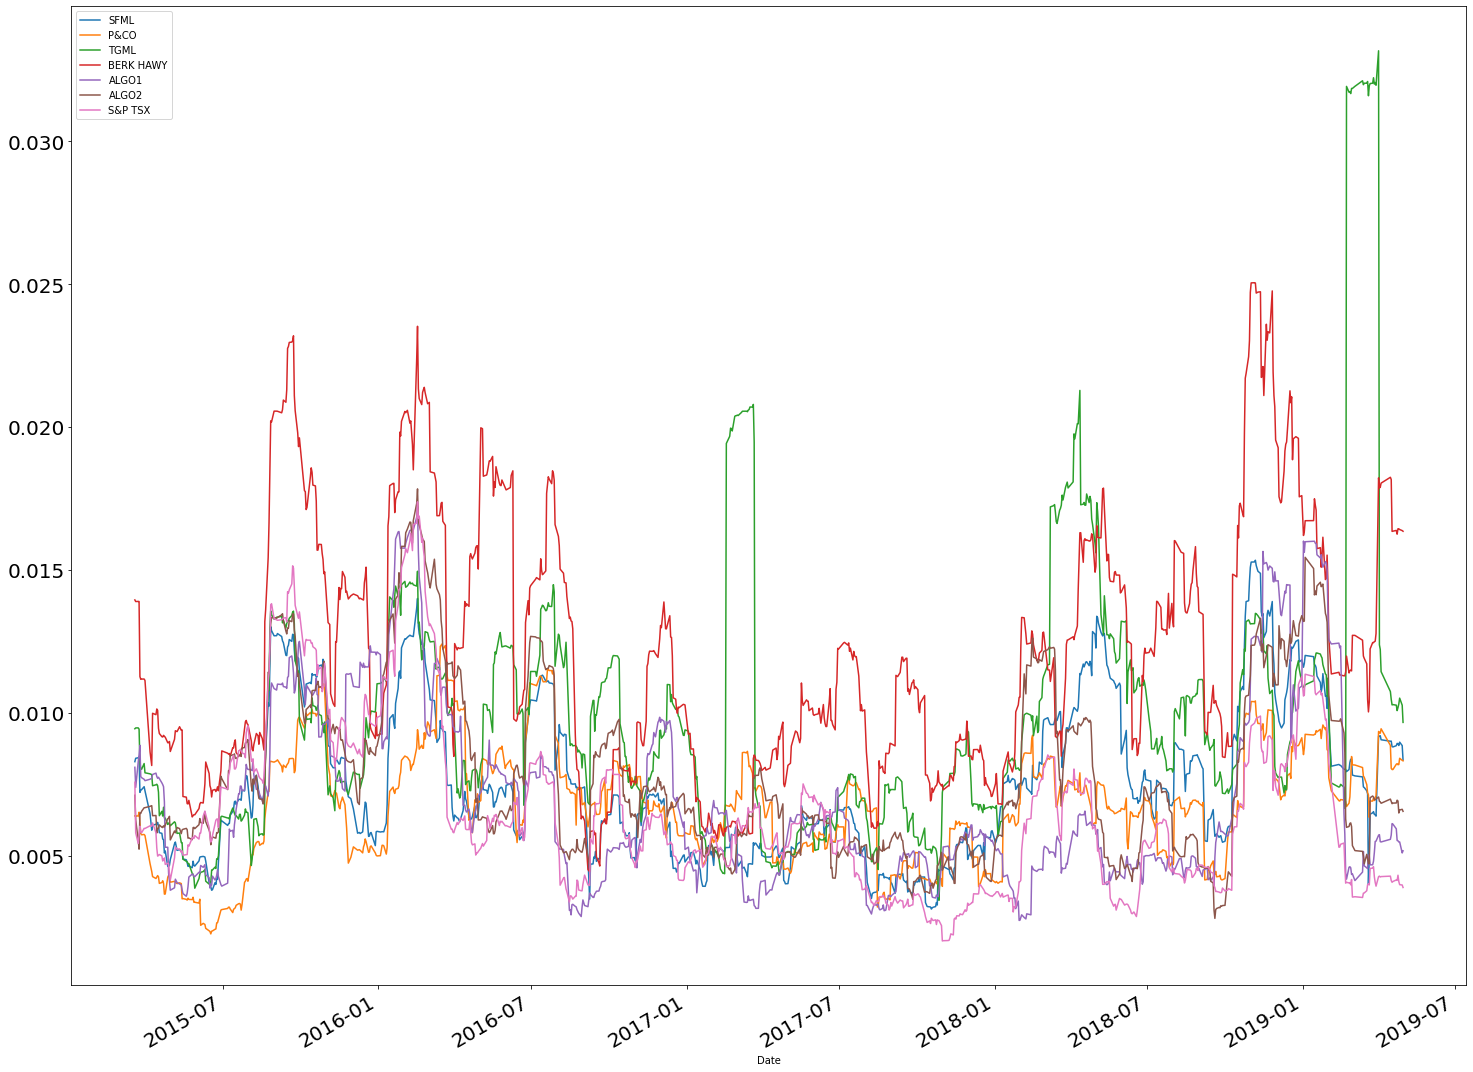

In [44]:

# Plot the rolling standard deviation
joined_df1.rolling(window=21).std().plot(fontsize=20, figsize=(25,20))

### Calculate and plot the correlation

In [46]:
# Calculate the correlation
correlation = daily_returns1.corr()
correlation




,SFML,P&CO,TGML,BERK HAWY,ALGO1,ALGO2,S&P TSX
SFML,1.000000,0.707963,0.558281,0.754574,0.266481,0.592810,0.522596
P&CO,0.707963,1.000000,0.439721,0.563597,0.205575,0.465056,0.392112
TGML,0.558281,0.439721,1.000000,0.410363,0.119904,0.365073,0.352908
BERK HAWY,0.754574,0.563597,0.410363,1.000000,0.226451,0.460978,0.424329
ALGO1,0.266481,0.205575,0.119904,0.226451,1.000000,0.277425,0.294740
ALGO2,0.592810,0.465056,0.365073,0.460978,0.277425,1.000000,0.740891
S&P TSX,0.522596,0.392112,0.352908,0.424329,0.294740,0.740891,1.000000


<AxesSubplot:>

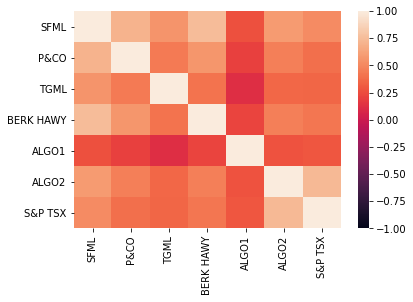

In [50]:
# Display de correlation matrix

sns.heatmap(correlation, vmin=-1, vmax=1)


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [63]:
# Calculate covariance of a single portfolio

covariance_algo1 =daily_returns1['ALGO1'].cov(daily_returns1['S&P TSX'])
                                       
print(f"ALGO 1 covariance is: {covariance_algo1}")


ALGO 1 covariance is: 1.5959484602304036e-05


In [61]:
# Calculate variance of S&P 60 TSX
#daily_returns1 = joined_df1
#variance =joined_df1 ['S&P TSX'].var()
variance =daily_returns1 ['S&P TSX'].var()

print(f"S&P 60 TSX variance is: {variance}")



S&P 60 TSX variance is: 5.0679318519541994e-05


In [59]:
# Computing beta
beta_algo1 = covariance_algo1 / variance
print(f"ALGO 1 Beta is: {algo1_beta}")


ALGO 1 Beta is: 0.31491119195199996


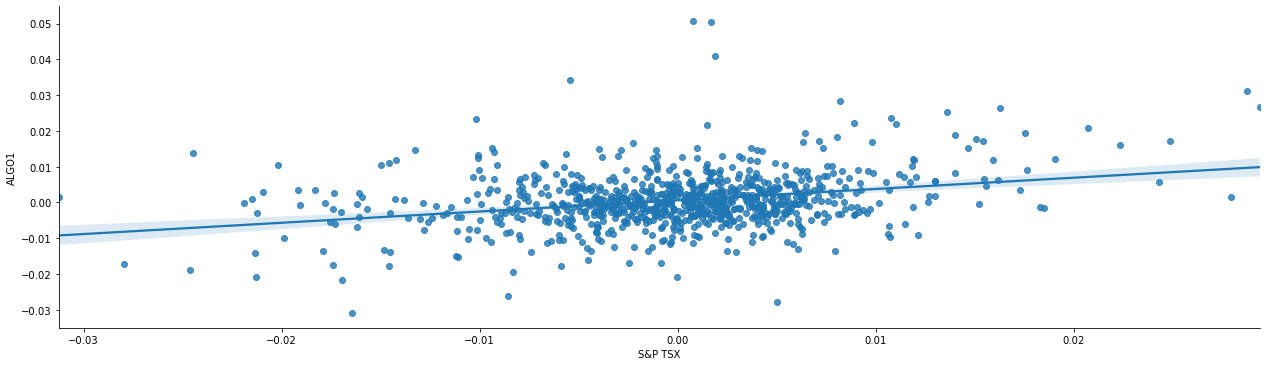

In [74]:
# Plot beta trend
import seaborn as sns
sns.lmplot (x= "S&P TSX" , y= "ALGO1" , data = daily_returns1 , aspect= 3.5 , fit_reg=True )

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [78]:
# Use `ewm` to calculate the rolling window

joined_df1.ewm(com=10.5).mean()


,SFML,P&CO,TGML,BERK HAWY,ALGO1,ALGO2,S&P TSX
Date,,,,,,,
2015-01-05,0.006051,0.002551,0.006526,0.009650,0.013712,-0.015621,-0.024465
2015-01-06,0.003976,0.001159,0.003552,0.006130,0.007750,-0.013720,-0.016977
2015-01-07,0.002032,0.001501,0.004376,0.003423,0.006193,-0.005296,-0.009819
2015-01-09,-0.003958,-0.002473,-0.003427,-0.008265,0.001737,-0.004323,-0.008455
2015-01-12,-0.002000,0.000514,-0.000457,-0.003765,-0.003297,-0.003837,-0.008427
...,...,...,...,...,...,...,...
2019-04-24,0.001689,0.000458,0.001121,0.003180,-0.000020,0.001194,0.000920
2019-04-25,0.001517,0.000306,0.000575,0.003325,0.000041,0.000460,0.000786
2019-04-26,0.002094,0.001076,0.001600,0.003943,0.000297,0.000877,0.000913


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [ ]:
# Reading data from 1st stock


In [ ]:
# Reading data from 2nd stock


In [ ]:
# Reading data from 3rd stock


In [ ]:
# Combine all stocks in a single DataFrame


In [ ]:
# Reset Date index


In [ ]:
# Reorganize portfolio data by having a column per symbol


In [ ]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualzied Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!